<b><font size=5><center>Сравнение тарифов мобильного оператора</center></font></b>

### Описание проекта

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов

- **Тариф «Смарт»**
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей
- **Тариф «Ультра»**
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей
**Примечание**
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Примите, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.

### Описание датасетов

- Таблица `users` (информация о пользователях):
    - user_id — уникальный идентификатор пользователя
    - first_name — имя пользователя
    - last_name — фамилия пользователя
    - age — возраст пользователя (годы)
    - reg_date — дата подключения тарифа (день, месяц, год)
    - churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    - city — город проживания пользователя
    - tariff — название тарифного плана
- Таблица `calls` (информация о звонках):
    - id — уникальный номер звонка
    - call_date — дата звонка
    - duration — длительность звонка в минутах
    - user_id — идентификатор пользователя, сделавшего звонок
- Таблица `messages` (информация о сообщениях):
    - id — уникальный номер сообщения
    - message_date — дата сообщения
    - user_id — идентификатор пользователя, отправившего сообщение
- Таблица `internet` (информация об интернет-сессиях):
    - id — уникальный номер сессии
    - mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    - session_date — дата интернет-сессии
    - user_id — идентификатор пользователя
- Таблица `tariffs` (информация о тарифах):
    - tariff_name — название тарифа
    - rub_monthly_fee — ежемесячная абонентская плата в рублях
    - minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    - messages_included — количество сообщений в месяц, включённых в абонентскую плату
    - mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    - rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    - rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    - rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Введение

В данном проекте я объединила полученные от "Мегалайн" датасеты в один. Привела типы данных в удобные для работы. 
Посчитала выручку с каждого пользователя в месяц.
Далее я проанализировала сколько минут, сообщений и мегабайт в среднем тратят пользователи каждого тарифа и добавила визуализацию.
Я проверила две гипотезы и сделала вывод - какой тариф лучше.


### Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
users = pd.read_csv(r'C:\Users\mi\Downloads\users.csv')
messages = pd.read_csv(r'C:\Users\mi\Downloads\messages.csv')
tariffs = pd.read_csv(r'C:\Users\mi\Downloads\tariffs.csv')
internet = pd.read_csv(r'C:\Users\mi\Downloads\internet.csv')
calls = pd.read_csv(r'C:\Users\mi\Downloads\calls.csv')

display(users.head())
display(internet.head())
display(messages.head())
display(calls.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Добавим столбец с месяцем в датасеты звонков, сообщений и интернета. Сгруппируем данные в них по user_id и месяцу использования и просуммируем все показатели пользователя за определенный месяц. Объединим все в один большой датасет

In [3]:
calls['duration'] = [math.ceil(i) for i in calls['duration']] #округление длительности звонков до целой минуты в большую сторону по условиям тарифа

calls['month'] = pd.DatetimeIndex(calls['call_date']).month
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

calls = calls.groupby(['user_id', 'month']).agg({'duration': 'sum'}).reset_index()
internet = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()
messages = messages.groupby(['user_id', 'month']).agg({'id': 'count'}).rename(columns = {'id': 'messages'}).reset_index()

data = calls.merge(internet, on = ['user_id', 'month'], how = 'outer')\
              .merge(messages, on = ['user_id', 'month'], how = 'outer').fillna(0)
data = data.merge(users, on = 'user_id', how = 'left').merge(tariffs, left_on = 'tariff', 
                                                                 right_on = 'tariff_name', how = 'left')
display(data.head())

,user_id,month,duration,mb_used,messages,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,159.0,2253.49,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,172.0,23233.77,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,340.0,14003.64,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,408.0,14055.93,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,466.0,14568.91,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra


Поработаем над типами данных. В столбцах с использованными минутами и мегабайтами приведет данные в целочисленный формат, округлив до целого вперед (как считается в тарифах). Количество сообщений также приведем в формат int64.

In [4]:
data['mb_used'] = data['mb_used'] / 1024 #перевод данных в гигабайты
data['mb_per_month_included'] = data['mb_per_month_included'] / 1024

data.rename(columns={'mb_used': 'gb_used', 'mb_per_month_included': 'gb_per_month_included'}, inplace=True) #переименуем столбцы для точности

data['gb_used'] = [math.ceil(a) for a in data['gb_used']] #округление гигабайтов до целого в большую сторону по условиям тарифа

data[['duration', 'gb_used', 'messages', 'gb_per_month_included']] = data[['duration', 'gb_used', 'messages', 'gb_per_month_included']].astype('int')
display(data.head())

,user_id,month,duration,gb_used,messages,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,159,3,22,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,ultra
1,1000,6,172,23,60,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,ultra
2,1000,7,340,14,75,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,ultra
3,1000,8,408,14,81,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,ultra
4,1000,9,466,15,57,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,ultra


Зная наверняка, что мы не будем оперировать супер-большими числами в нашем дальнейшем анализе, можно перевести int64 в int32, для сокращения объема используемой памяти.

In [5]:
data[['user_id', 'month', 'age', 'messages_included', 'gb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute']] = data[['user_id', 'month', 'age', 'messages_included', 'gb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute']].astype('int32')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   user_id                3214 non-null   int32 
 1   month                  3214 non-null   int32 
 2   duration               3214 non-null   int32 
 3   gb_used                3214 non-null   int32 
 4   messages               3214 non-null   int32 
 5   age                    3214 non-null   int32 
 6   churn_date             187 non-null    object
 7   city                   3214 non-null   object
 8   first_name             3214 non-null   object
 9   last_name              3214 non-null   object
 10  reg_date               3214 non-null   object
 11  tariff                 3214 non-null   object
 12  messages_included      3214 non-null   int32 
 13  gb_per_month_included  3214 non-null   int32 
 14  minutes_included       3214 non-null   int32 
 15  rub_monthly_fee      

Меня смущает столбец churn_date. Врядли мы будем использовать в дальнейшей работе с данными эти даты. Для нас, теоретически, может быть полезно посмотреть статистику - как часто отказываются отказываются и от какого тарифа. Поэтому я попробую перевести данные в булевы - просто укажем пользуется ли юзер еще данным тарифом или нет. Посмотрим, пригодится ли нам это. 
Мы знаем, что пропуск в данном столбце означает, что человек еще пользуется тарифом. От этого будем плясать.

In [6]:
data['churn_date'] = data['churn_date'].fillna(True)
data.loc[data['churn_date'] != True, 'churn_date'] = False
data.rename(columns={'churn_date': 'still_using_tariff'}, inplace=True)
display(data.head(10))

,user_id,month,duration,gb_used,messages,age,still_using_tariff,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,159,3,22,52,True,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,ultra
1,1000,6,172,23,60,52,True,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,ultra
2,1000,7,340,14,75,52,True,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,ultra
3,1000,8,408,14,81,52,True,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,ultra
4,1000,9,466,15,57,52,True,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,ultra
5,1000,10,350,15,73,52,True,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,ultra
6,1000,11,338,15,58,52,True,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,ultra
7,1000,12,333,10,70,52,True,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,ultra
8,1001,11,430,18,0,41,True,Москва,Иван,Ежов,2018-11-01,smart,50,15,500,550,200,3,3,smart
9,1001,12,414,14,0,41,True,Москва,Иван,Ежов,2018-11-01,smart,50,15,500,550,200,3,3,smart


Удалим столбец tariff_name, т.к. он дублируется со столбцом tariff

In [7]:
data = data.drop(columns='tariff_name')
display(data.head())

,user_id,month,duration,gb_used,messages,age,still_using_tariff,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159,3,22,52,True,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
1,1000,6,172,23,60,52,True,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
2,1000,7,340,14,75,52,True,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
3,1000,8,408,14,81,52,True,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
4,1000,9,466,15,57,52,True,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1


Посчитаем ежемесячную выручку с каждого пользователя.

In [8]:
mask_1 = data['duration'] > data['minutes_included']
mask_2 = data['messages'] > data['messages_included']
mask_3 = data['gb_used'] > data['gb_per_month_included']

data['revenue'] = (
    (data['duration'] - data['minutes_included']) * data['rub_per_minute'] * mask_1 + 
    (data['messages'] - data['messages_included']) * data['rub_per_message'] * mask_2 +
    np.ceil((data['gb_used'] - data['gb_per_month_included'])) * data['rub_per_gb'] * mask_3 + 
    data['rub_monthly_fee']
).astype('int')
display(data.head())

,user_id,month,duration,gb_used,messages,age,still_using_tariff,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,1000,5,159,3,22,52,True,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950
1,1000,6,172,23,60,52,True,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950
2,1000,7,340,14,75,52,True,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950
3,1000,8,408,14,81,52,True,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950
4,1000,9,466,15,57,52,True,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950


### Анализ данных

Проанализируем, сколько минут, сообщений и мегабайт в среднем тратят пользователи каждого тарифа

In [9]:
tariff_ultra = data[['tariff', 'duration', 'gb_used', 'messages']].query('tariff == "ultra"')
tariff_smart = data[['tariff', 'duration', 'gb_used', 'messages']].query('tariff == "smart"')
print('Дисперсия в совокупности по тарифу Ультра:', '\n',np.var(tariff_ultra))
print('Дисперсия в совокупности по тарифу Смарт:', '\n',np.var(tariff_smart))
print('Описание используемых параметров пользователями тарифа "Ультра"', '\n', tariff_ultra.describe().applymap("{:.2f}".format))
print()
print('Описание используемых параметров пользователями тарифа "Смарт"', '\n', tariff_smart.describe().applymap("{:.2f}".format))

Дисперсия в совокупности по тарифу Ультра: 
 duration    100771.223617
gb_used         96.993116
messages      2282.946075
dtype: float64
Дисперсия в совокупности по тарифу Смарт: 
 duration    36203.066652
gb_used        33.013887
messages      796.455483
dtype: float64
Описание используемых параметров пользователями тарифа "Ультра" 
       duration gb_used messages
count   985.00  985.00   985.00
mean    526.62   19.49    49.36
std     317.61    9.85    47.80
min       0.00    0.00     0.00
25%     284.00   12.00     6.00
50%     518.00   19.00    38.00
75%     752.00   27.00    79.00
max    1673.00   49.00   224.00

Описание используемых параметров пользователями тарифа "Смарт" 
       duration  gb_used messages
count  2229.00  2229.00  2229.00
mean    417.93    16.33    33.38
std     190.31     5.75    28.23
min       0.00     0.00     0.00
25%     282.00    13.00    10.00
50%     422.00    17.00    28.00
75%     545.00    20.00    51.00
max    1435.00    38.00   143.00


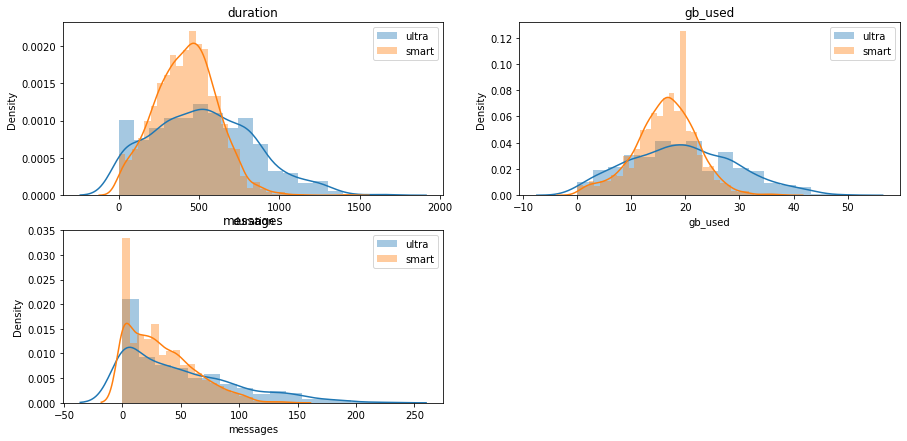

In [10]:
params = ['duration', 'gb_used', 'messages']
col_count, row_count = 2, 2 #число рядов и столбцов в сетке графиков

plt.figure(figsize = (15,7))

for i, param in enumerate(params):
    for tariff in data['tariff'].unique():
        current = data.query('tariff == @tariff')
        sns.distplot(current[param], label = tariff,
                    ax=plt.subplot(row_count, col_count, i+1)
                    )
    plt.title(param)
    plt.legend() 
plt.show()

При анализе поведения пользователей разных тарифов мы видим, что стандратное отклонение, среднее и другие параметры по показателям тарифа Смарт выше, чем у тарифа Ультра. На графике это выливается в более "размазанный" график у тарифа Ультра, и более компактным распределением у тарифа Смарт. Можно предположить, что это связано с более жесткими рамками в тарифе Смарт - меньшим количеством включенных минут, мегабайт и сообщений в базовый пакет, чем у тарифа Ультра. Таким образов пользователи тарифа Смарт могт ужиматься в использовании, чтобы не входить за рамки тарифа.

### Проверка гипотез

#### Гипотеза 1

Нулевая гипотеза - средняя выручка пользователей тарифов «Ультра» и «Смарт» не отличается
Альтернативная гипотеза - средняя выручка пользователей тарифов «Ультра» и «Смарт» отличается

In [11]:
alpha = .05

results = sp.stats.ttest_ind(
    data.loc[data['tariff'] == 'ultra', 'revenue'], 
    data.loc[data['tariff'] == 'smart', 'revenue'])
print('Средняя выручка в тарифе Смарт:', data.loc[data['tariff'] == 'smart', 'revenue'].mean())
print('Средняя выручка в тарифе Ультра:', data.loc[data['tariff'] == 'ultra', 'revenue'].mean())

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средняя выручка в тарифе Смарт: 1289.9735307312696
Средняя выручка в тарифе Ультра: 2070.1522842639592
p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


Нулевая гипотеза 1 опровергнута. Выручка у тарифа Ультра почти в 2 раза выше выручки тарифа Смарт.

#### Гипотеза 2

Нулевая гипотеза - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.
Альтернативная гипотеза - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [12]:
alpha = .05

results = sp.stats.ttest_ind(
    data.loc[data['city'] == 'Москва', 'revenue'], 
    data.loc[data['city'] != 'Москва', 'revenue'])

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5440152911670223
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не опровергнута. В данной выборке выручка в Москве и других городах почти не отличается.

Для проверки обеих гипотез я выбрала метод проверки гипотез о равенстве средних двух генеральных совокупностей, т.к. посчитала ее наиболее подходящей для них. 

### Общий вывод

В ходе работы над проектом я объединила полученные от "Мегалайн" датасеты в один. Привела типы данных в удобные для работы. 
Посчитала выручку с каждого пользователя в месяц.
Далее я проанализировала сколько минут, сообщений и мегабайт в среднем тратят пользователи каждого тарифа и добавила визуализацию.
Я проверила две гипотезы и сделала вывод - какой тариф лучше.
На основании анализа и проверки гипотез можно сделать вывод, что тариф Ультра лучше, т.к. приносит больше денег. Средняя выручка от этого тарифа почти в два раза больше средней выручки от тарифа Смарт. При этом, выручка в Москве и регионах почти не отличается. 
Также по графикам поведения пользователей видно, что пользователи тарифа Смарт менее охотно выходят за рамки базового пакета.
Общий вывод - тариф Ультра лучше.